In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import pickle
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

ModuleNotFoundError: No module named 'lightgbm'

In [3]:
df = pd.read_csv('../data/csv/track_vectors_1.csv', index_col=0)

In [4]:
for i in range(2, 9):
    df = pd.concat([df, pd.read_csv(f'../data/csv/track_vectors_{i}.csv', index_col=0)], axis=0)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.to_csv('../data/csv/merge_df_2.csv')

In [13]:
random.seed(3214)

In [45]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [47]:
main_dict[131792]

{'artist_name': 'Pranavibes',
 'track_title': 'Invitation',
 'artist_tags': [('experimental', '100'),
  ('beatbox', '100'),
  ('didgeridoo', '100'),
  ('vibration', '100'),
  ('Guitare', '100'),
  ('Scie musicale', '100'),
  ('pranavibes', '100')],
 'track_tags': [],
 'similar_tracks': [],
 'similar_list': []}

In [15]:
df = pd.read_csv('../data/csv/merge_df_2.csv', index_col=0)
df

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,0.008984,0.031454,0.108398,0.029397,0.009277,0.014918
1,061172.mp3,-692.448303,117.801537,18.185888,5.736947,5.938968,31.851004,1.060427,4.214683,-0.146251,...,-0.198049,0.948205,0.390652,0.080923,0.000357,0.059621,0.351562,0.068662,0.002930,0.058827
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,0.017999,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,0.022331,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,0.010698,0.055768,0.450195,0.098991,0.005859,0.067057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,131914.mp3,-654.926941,144.197983,-5.618096,12.815182,-4.743158,4.794647,-0.457318,2.406655,-8.439367,...,0.907090,0.585478,0.172700,0.063363,0.016716,0.027547,0.136230,0.058892,0.012207,0.026086
7978,131772.mp3,-625.237183,158.683304,-10.997794,23.054964,11.636267,-1.839731,-17.972336,-9.967291,-12.986640,...,0.608825,0.747877,0.245719,0.111260,0.006103,0.040364,0.070312,0.020365,0.005859,0.009048
7979,131792.mp3,-655.022644,144.006958,5.970843,14.379925,14.236056,3.561646,-4.041969,-4.800819,-3.666181,...,0.740162,0.707120,0.290256,0.078840,0.007514,0.051776,0.104980,0.032318,0.000488,0.014633
7980,131624.mp3,-788.494507,75.723251,35.248608,28.392780,4.289547,18.946749,-5.460835,10.575089,-8.978883,...,0.130618,0.542250,0.212018,0.045943,0.000970,0.043634,0.321289,0.102740,0.007812,0.053932


In [16]:
df.drop(df.columns[1:553], axis=1)

,track
0,061010.mp3
1,061172.mp3
2,061589.mp3
3,061493.mp3
4,061492.mp3
...,...
7977,131914.mp3
7978,131772.mp3
7979,131792.mp3
7980,131624.mp3


In [17]:
df

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,0.008984,0.031454,0.108398,0.029397,0.009277,0.014918
1,061172.mp3,-692.448303,117.801537,18.185888,5.736947,5.938968,31.851004,1.060427,4.214683,-0.146251,...,-0.198049,0.948205,0.390652,0.080923,0.000357,0.059621,0.351562,0.068662,0.002930,0.058827
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,0.017999,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,0.022331,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,0.010698,0.055768,0.450195,0.098991,0.005859,0.067057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,131914.mp3,-654.926941,144.197983,-5.618096,12.815182,-4.743158,4.794647,-0.457318,2.406655,-8.439367,...,0.907090,0.585478,0.172700,0.063363,0.016716,0.027547,0.136230,0.058892,0.012207,0.026086
7978,131772.mp3,-625.237183,158.683304,-10.997794,23.054964,11.636267,-1.839731,-17.972336,-9.967291,-12.986640,...,0.608825,0.747877,0.245719,0.111260,0.006103,0.040364,0.070312,0.020365,0.005859,0.009048
7979,131792.mp3,-655.022644,144.006958,5.970843,14.379925,14.236056,3.561646,-4.041969,-4.800819,-3.666181,...,0.740162,0.707120,0.290256,0.078840,0.007514,0.051776,0.104980,0.032318,0.000488,0.014633
7980,131624.mp3,-788.494507,75.723251,35.248608,28.392780,4.289547,18.946749,-5.460835,10.575089,-8.978883,...,0.130618,0.542250,0.212018,0.045943,0.000970,0.043634,0.321289,0.102740,0.007812,0.053932


In [18]:
test_idx = list()
while len(test_idx) < 100:
    idx = random.randint(0, df.shape[0] - 1)
    if idx in test_idx:
        continue
    track_id = int(df.loc[idx].track[:-4])
    tags = main_dict[track_id]['all_tags']
    if len(tags) >= 10:
        test_idx.append(idx)

KeyError: 'all_tags'

In [35]:
main_dict[66643].keys()

dict_keys(['artist_name', 'track_title', 'artist_tags', 'track_tags', 'similar_tracks', 'similar_list'])

In [54]:
df_test = pd.read_csv('../data/csv/test.csv', index_col=0)
df_test

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
7301,010673.mp3,-626.681091,132.151154,11.753740,45.711430,-0.209040,10.068515,-0.682384,5.395576,-4.435939,...,0.461337,0.281160,0.329500,0.124018,0.027167,0.045374,0.130859,0.031217,0.003418,0.019365
3931,066643.mp3,-687.945374,141.427277,-16.972485,19.092112,6.906140,3.117708,6.967309,-2.045398,-7.208217,...,-0.111801,0.627290,0.380662,0.080697,0.000165,0.061523,0.282227,0.049509,0.002930,0.025951
5176,000194.mp3,-782.241943,178.044266,-29.330959,18.219608,-14.123279,-10.458302,-16.387886,-5.279102,-16.686710,...,0.276664,0.634153,0.264619,0.043619,0.000129,0.038136,0.169922,0.037896,0.001953,0.017058
80,074421.mp3,-623.853394,122.672737,17.257471,4.505549,0.719744,-2.922961,-5.741470,-1.727011,-18.558123,...,0.421106,0.539590,0.264868,0.082399,0.007031,0.040712,0.224121,0.051835,0.009277,0.032241
7903,131553.mp3,-645.512512,74.718880,12.483846,45.145756,38.911320,16.187067,6.199753,0.013115,-3.431449,...,0.100123,0.391042,0.335317,0.112432,0.000625,0.050604,0.271973,0.079668,0.008789,0.049538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,075436.mp3,-800.051819,241.068558,40.636051,-0.057632,6.397528,-18.648108,-1.818632,3.204657,-0.186070,...,0.923011,1.546881,1.210505,0.112725,0.010022,0.145565,0.138184,0.015291,0.000488,0.012997
4878,063655.mp3,-758.179688,233.961899,28.287888,11.515189,6.204473,16.416714,-10.615239,0.827990,5.827968,...,1.715050,0.839399,1.088153,0.082296,0.024415,0.079127,0.032227,0.012229,0.000488,0.004685
5520,053301.mp3,-650.022522,133.733185,7.322467,12.278226,36.223629,19.627594,21.320019,11.456765,6.618299,...,0.419925,0.407566,0.518842,0.109679,0.016570,0.091477,0.231445,0.044514,0.002930,0.038336
3641,062526.mp3,-666.008362,121.186523,6.822075,42.061932,-10.464552,14.471254,7.220425,5.017753,-1.855397,...,0.230255,0.614144,0.625459,0.092227,0.006027,0.086389,0.187500,0.035097,0.001953,0.022623


In [55]:
df_test_2 = df[df['file'].isin(df_test['track'])]
df_test_2

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
31,113343.mp3,-768.410583,177.532913,-5.232254,-1.268531,-16.643265,-22.899082,-12.472708,-13.560805,-32.071739,...,0.067390,0.145798,0.754852,0.559476,0.225193,0.102047,35.872833,27.349634,7.658070,8.931489
117,099411.mp3,-614.496033,161.632812,-30.135782,20.613056,-3.866533,0.235105,-3.852171,5.199200,4.165448,...,0.322384,0.084757,0.763652,0.476928,0.216093,0.093903,34.102570,11.609141,3.171824,5.582154
150,099419.mp3,-600.287109,152.651749,-6.931434,16.835726,-7.863964,-0.967983,-11.526454,2.808550,3.023355,...,0.418272,0.073019,0.830834,0.591593,0.312676,0.130382,35.713341,10.028034,3.322457,5.291312
179,074421.mp3,-623.853394,122.672737,17.257471,4.505549,0.719744,-2.922961,-5.741470,-1.727011,-18.558123,...,0.247513,0.099405,0.629668,0.534170,0.403778,0.045467,35.743763,15.102151,4.752180,7.138603
290,144469.mp3,-723.618652,252.936325,-30.126852,29.864367,19.096693,-6.951768,-14.872321,-2.849590,0.601918,...,0.204854,0.104727,0.695542,0.541956,0.271407,0.079417,35.818981,15.647316,3.569310,7.347943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,001040.mp3,-563.456299,104.120575,-6.972217,39.065773,12.155280,29.084288,-4.599654,1.194338,-0.117812,...,0.198499,0.118034,0.692115,0.444388,0.283190,0.068971,35.147663,10.454682,2.464400,5.436674
7767,001686.mp3,-665.148071,110.822456,1.305718,19.301023,-8.485282,2.736990,-10.153784,-9.214011,-8.195502,...,0.105094,0.121080,0.801286,0.576270,0.340960,0.093195,35.845860,15.940372,3.966340,7.548143
7822,004079.mp3,-623.008057,93.500755,21.506807,34.539505,5.349083,1.526804,-4.189599,-1.122090,-7.840350,...,0.152666,0.095020,0.746929,0.545348,0.295329,0.100399,35.796947,12.347969,3.913325,5.723447
7842,004835.mp3,-631.604858,120.129745,-22.318903,19.311491,-9.074204,2.220330,-10.822631,-6.159751,1.399805,...,0.027199,0.168232,0.741165,0.527163,0.292858,0.104844,35.861649,11.543086,2.355000,6.220985


In [77]:
df_train = pd.read_csv('../data/csv/train.csv', index_col=0)
df_train_2 = df[df['file'].isin(df_train['track'])]


In [59]:
df_train_2 = df.drop(df_test_2.index)
df_train_2

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,113360.mp3,-862.656494,206.789871,50.152176,25.817299,16.106518,-1.038179,-14.124306,0.469769,-18.041723,...,0.104731,0.131907,0.839291,0.532144,0.258613,0.124811,35.831059,14.959072,3.070178,7.288480
1,113564.mp3,-645.366455,138.021118,13.892608,22.599394,18.474199,3.581496,-4.732511,-14.586736,-8.281308,...,0.259244,0.097776,0.691749,0.467287,0.207034,0.111577,35.785088,13.921927,2.618005,6.847598
2,113950.mp3,-794.236084,169.969589,26.764826,38.086010,10.864186,12.172462,-6.645301,-3.275297,-9.829071,...,0.112524,0.130163,0.770893,0.615786,0.365535,0.079525,35.804550,15.433070,2.676239,7.629828
3,113267.mp3,-639.567993,129.603104,-77.233673,1.809941,3.417638,-8.119690,-14.168982,9.181040,-12.034758,...,0.273620,0.119000,0.741139,0.547176,0.267749,0.099131,35.739342,10.841406,2.722672,5.521516
4,113261.mp3,-663.177551,117.829987,44.321461,32.515041,4.016469,9.938189,-4.446004,6.427977,-5.873170,...,0.136364,0.138839,0.663160,0.460699,0.237102,0.089502,35.844589,11.433019,3.062327,5.329480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,029040.mp3,-688.951660,110.380043,-1.830580,41.865685,12.073243,27.379248,25.519491,18.643660,2.040310,...,0.037965,0.156953,0.627632,0.452549,0.259658,0.089888,35.813511,13.423307,3.492393,6.177996
7982,029255.mp3,-712.312744,168.428848,-79.193497,15.317687,-19.223267,-3.262109,-13.500081,-9.117866,0.947261,...,0.140011,0.139329,0.697704,0.469045,0.260135,0.084404,35.851913,16.614149,0.000000,10.594819
7983,029526.mp3,-781.963379,16.143452,-47.208302,-46.300362,-41.306210,-26.232506,-31.810162,-15.413300,6.781355,...,0.225821,0.115231,0.569408,0.446405,0.227650,0.060741,35.851040,20.483692,4.004978,8.654058
7984,029245.mp3,-628.765808,109.755341,11.579667,35.267372,0.912285,4.590338,4.857110,8.353178,12.665811,...,0.287203,0.092962,0.747907,0.542799,0.222208,0.104758,35.841602,13.581528,3.772308,6.252968


In [78]:
df_train_2.to_csv('../data/csv/train_2.csv')
df_test_2.to_csv('../data/csv/test_2.csv')

In [145]:
df_train = pd.read_csv('../data/csv/train_2.csv', index_col=0)
df_test = pd.read_csv('../data/csv/test_2.csv', index_col=0)

In [146]:
df_train = df_train.drop(df_train.columns[1:553], axis=1)
df_test = df_test.drop(df_test.columns[1:553], axis=1)

In [147]:
df_train

,file,average_loudness,dynamic_complexity,beats_count,bpm,onset_rate,danceability,chords_changes,chords_number,mfcc1_mean.8,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,113360.mp3,0.735970,5.961013,57,110.600258,2.767721,1.203128,0.085008,0.020093,-858.344360,...,0.104731,0.131907,0.839291,0.532144,0.258613,0.124811,35.831059,14.959072,3.070178,7.288480
1,113564.mp3,0.968318,1.603451,61,124.743881,5.735518,1.081261,0.088099,0.026275,-667.543823,...,0.259244,0.097776,0.691749,0.467287,0.207034,0.111577,35.785088,13.921927,2.618005,6.847598
2,113950.mp3,0.866255,5.594617,72,147.022476,3.601372,0.990250,0.034003,0.010819,-810.841736,...,0.112524,0.130163,0.770893,0.615786,0.365535,0.079525,35.804550,15.433070,2.676239,7.629828
3,113267.mp3,0.978087,1.169995,79,161.498962,3.267912,1.071076,0.047913,0.010819,-618.257324,...,0.273620,0.119000,0.741139,0.547176,0.267749,0.099131,35.739342,10.841406,2.722672,5.521516
4,113261.mp3,0.958599,2.754046,44,90.023399,4.601753,1.261835,0.151468,0.024730,-656.268799,...,0.136364,0.138839,0.663160,0.460699,0.237102,0.089502,35.844589,11.433019,3.062327,5.329480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7981,029040.mp3,0.601901,4.741628,46,94.569443,4.835176,1.093997,0.075734,0.015456,-746.406067,...,0.037965,0.156953,0.627632,0.452549,0.259658,0.089888,35.813511,13.423307,3.492393,6.177996
7982,029255.mp3,0.651028,5.826573,80,178.205734,3.197506,0.835034,0.084877,0.018519,-733.472656,...,0.140011,0.139329,0.697704,0.469045,0.260135,0.084404,35.851913,16.614149,0.000000,10.594819
7983,029526.mp3,0.957812,2.884877,64,129.861832,3.201220,1.139050,0.063369,0.009274,-659.415771,...,0.225821,0.115231,0.569408,0.446405,0.227650,0.060741,35.851040,20.483692,4.004978,8.654058
7984,029245.mp3,0.969260,2.810955,69,140.128616,3.630502,1.424422,0.067901,0.013889,-651.825989,...,0.287203,0.092962,0.747907,0.542799,0.222208,0.104758,35.841602,13.581528,3.772308,6.252968


In [153]:
features_train = df_train.drop(['file'], 1)
features_test = df_test.drop(['file'], 1)

In [154]:
scaler = StandardScaler()
scaler.fit(features_train)
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

In [155]:
# pca = PCA(0.95)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)

In [156]:
X_train.shape

(7882, 77)

In [157]:
X_test.shape

(100, 77)

In [158]:
# pca.explained_variance_ratio_

In [159]:
neigh = NearestNeighbors(10, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [160]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].file[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [161]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].file[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [162]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

In [163]:
mean_ap

0.10599999999999993

In [164]:
mean_ndcg

0.12524688935720543

In [165]:
cos_similarity_mtx = cosine_similarity(X_test, X_train)

In [166]:
mean_ap = 0
ndcg = 0
for i in range(100):
    arr = cos_similarity_mtx[i]
    neighbors = arr.argsort()[-10:][::-1]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
#     print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

In [167]:
print(mean_ap, mean_ndcg)

0.11199999999999993 0.12419061246513172


In [168]:
neigh = NearestNeighbors(100, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [231]:
truth_score = list()
for i in range(100):
#     neighbors = neigh.kneighbors([X_test[i]])[1][0]
    query_id = int(df_test.iloc[i].file[:-4])
    query_tags = main_dict[query_id]['all_tags']
    temp = list()
    for neighbor in range(len(X_train)):
        answer_id = int(df_train.iloc[neighbor].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        j = 0
        for tag in answer_tags:
            if tag in query_tags:
                j += 1
        if j == 0:
            temp.append((i, neighbor, 0))
            continue

        precision = j / len(answer_tags)
        recall = j / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        temp.append((i, neighbor, score))
    truth_score.append(temp)

In [232]:
len(truth_score)

100

In [233]:
res_sort =[x[1] for x in sorted(truth_score[2], key=lambda x:x[2], reverse=True)][:10]
res_sort

[4842, 4855, 2400, 4336, 4390, 5524, 5546, 7230, 5227, 6460]

In [234]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = [x[1] for x in sorted(truth_score[i], key=lambda x:x[2], reverse=True)][:10]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in neighbors])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['113344', '049030', '049029', '113342', '007711', '007710', '007712', '007709', '007713', '106343']
99411 ['091093', '091092', '053807', '124201', '084788', '068821', '068820', '070409', '003624', '073192']
99419 ['091093', '091092', '053807', '124201', '084788', '068821', '068820', '070409', '003624', '073192']
74421 ['074445', '142381', '138053', '000716', '072056', '072058', '121273', '040509', '114976', '114974']
144469 ['144466', '144470', '144465', '144468', '144472', '144473', '144474', '144476', '144475', '144471']
22476 ['022478', '022477', '022475', '022481', '022473', '022480', '022472', '022479', '022474', '061592']
107579 ['107574', '107571', '107596', '107569', '107588', '107594', '107592', '107589', '107583', '107590']
194 ['000207', '000197', '000200', '000625', '000193', '000203', '000204', '000212', '000211', '000210']
667 ['000666', '084788', '125312', '117942', '125313', '125314', '025670', '025668', '054465', '054470']
190 ['000207', '000197', '000200', '00

69204 ['069202', '092551', '069195', '069198', '069201', '069210', '069208', '092561', '125299', '051784']
1040 ['001039', '003833', '003840', '084788', '040985', '050539', '071276', '046079', '009513', '016879']
1686 ['006367', '006379', '006354', '006389', '006330', '001681', '001680', '001687', '001683', '001685']
4079 ['004071', '004076', '004077', '004072', '004074', '004075', '004073', '004080', '004078', '004070']
4835 ['006788', '004838', '004836', '137424', '137425', '137419', '137426', '137417', '137423', '137418']
4233 ['004234', '004235', '004232', '004236', '004239', '006367', '006379', '006354', '006389', '006330']


In [235]:
print(mean_ap, mean_ndcg)

0.9129999999999998 0.9282665190154689


In [228]:
print(mean_ap, mean_ndcg)

0.37200000000000005 0.46940859652090067


In [71]:
mean_ap

0.11199999999999993

In [72]:
mean_ndcg

0.12419061246513172

In [93]:
result = list()
for track in df_train.file.values:
    idx = int(track[:-4])
    if len(main_dict[idx]['all_tags']) >=10:
        result.append(track)
        

In [94]:
len(result)

4013

In [143]:
similarity_1 = list()
# similarity_2 = list()
# similarity_3 = list()
# similarity_4 = list()
# similarity_5 = list()
# similarity_6 = list()
# similarity_7 = list()
# similarity_8 = list()
similarity_9 = list()


In [147]:
while len(similarity_9) < 4000:
    track_1, track_2 = random.sample(result, 2)
    tags_1 = main_dict[int(track_1[:-4])]['all_tags']
    tags_2 = main_dict[int(track_2[:-4])]['all_tags']
    intersection = set(tags_1) & set(tags_2)
    if len(intersection) == 0:
        similarity_9.append((track_1, track_2, 0))
        continue
#     precision = len(intersection) / len(tags_1)
#     recall = len(intersection) / len(tags_2)
#     score = 2 * precision * recall / (precision + recall)
#     score = round(score, 2)
#     if 0 < score < 0.1:
#         similarity_1.append((track_1, track_2, score))


In [150]:
all_similarity = similarity_1 +\
similarity_2 +\
similarity_3 +\
similarity_4 +\
similarity_5 +\
similarity_6 +\
similarity_7 +\
similarity_8 +\
similarity_9

In [152]:
all_similarity = list(set(all_similarity))

In [153]:
len(all_similarity)

34116

In [238]:
sc = [x[2] for x in all_similarity]

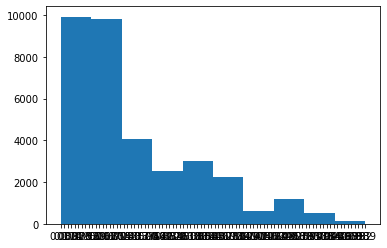

In [239]:
plt.hist(sc)
plt.show()

In [156]:
for tuple in all_similarity:
    with open('../data/tags_similarity.txt', 'a+') as f:
        f.write(f'{tuple[0]} {tuple[1]} {tuple[2]}' + '\n')

In [236]:
with open('../data/tags_similarity.txt', 'r') as f:
    data = f.readlines()

In [237]:
all_similarity = [x.strip('\n').split() for x in data]

In [65]:
df_train_2 = df_train.reset_index(drop=True)
df_train_2

,file,mfcc1_mean,mfcc2_mean,mfcc3_mean,mfcc4_mean,mfcc5_mean,mfcc6_mean,mfcc7_mean,mfcc8_mean,mfcc9_mean,...,pitch_salience.min.8,pitch_salience.std.8,chords.max.8,chords.mean.8,chords.min.8,chords.std.8,hpcp.max.8,hpcp.mean.8,hpcp.min.8,hpcp.std.8
0,113360.mp3,-862.656494,206.789871,50.152176,25.817299,16.106518,-1.038179,-14.124306,0.469769,-18.041723,...,0.104731,0.131907,0.839291,0.532144,0.258613,0.124811,35.831059,14.959072,3.070178,7.288480
1,113564.mp3,-645.366455,138.021118,13.892608,22.599394,18.474199,3.581496,-4.732511,-14.586736,-8.281308,...,0.259244,0.097776,0.691749,0.467287,0.207034,0.111577,35.785088,13.921927,2.618005,6.847598
2,113950.mp3,-794.236084,169.969589,26.764826,38.086010,10.864186,12.172462,-6.645301,-3.275297,-9.829071,...,0.112524,0.130163,0.770893,0.615786,0.365535,0.079525,35.804550,15.433070,2.676239,7.629828
3,113267.mp3,-639.567993,129.603104,-77.233673,1.809941,3.417638,-8.119690,-14.168982,9.181040,-12.034758,...,0.273620,0.119000,0.741139,0.547176,0.267749,0.099131,35.739342,10.841406,2.722672,5.521516
4,113261.mp3,-663.177551,117.829987,44.321461,32.515041,4.016469,9.938189,-4.446004,6.427977,-5.873170,...,0.136364,0.138839,0.663160,0.460699,0.237102,0.089502,35.844589,11.433019,3.062327,5.329480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,029040.mp3,-688.951660,110.380043,-1.830580,41.865685,12.073243,27.379248,25.519491,18.643660,2.040310,...,0.037965,0.156953,0.627632,0.452549,0.259658,0.089888,35.813511,13.423307,3.492393,6.177996
7878,029255.mp3,-712.312744,168.428848,-79.193497,15.317687,-19.223267,-3.262109,-13.500081,-9.117866,0.947261,...,0.140011,0.139329,0.697704,0.469045,0.260135,0.084404,35.851913,16.614149,0.000000,10.594819
7879,029526.mp3,-781.963379,16.143452,-47.208302,-46.300362,-41.306210,-26.232506,-31.810162,-15.413300,6.781355,...,0.225821,0.115231,0.569408,0.446405,0.227650,0.060741,35.851040,20.483692,4.004978,8.654058
7880,029245.mp3,-628.765808,109.755341,11.579667,35.267372,0.912285,4.590338,4.857110,8.353178,12.665811,...,0.287203,0.092962,0.747907,0.542799,0.222208,0.104758,35.841602,13.581528,3.772308,6.252968


In [165]:
features = list()
target = list()
for tupple in all_similarity:
    idx_1 = df_train_2[df_train_2.file == tupple[0]].index[0]
    idx_2 = df_train_2[df_train_2.file == tupple[1]].index[0]
    arr_1 = X_train[idx_1]
    arr_2 = X_train[idx_2]
    combo = np.hstack((arr_1, arr_2))
    features.append(combo)
    target.append(float(tupple[2]))

In [166]:
features_train, features_test, target_train, target_test = train_test_split(
    features,
    target,
    random_state=123
)

In [21]:
models = {
    'GBR': {
        'model': GradientBoostingRegressor(),
        'params': {
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': np.arange(80, 200),
            'subsample': np.arange(0.6, 1.01, 0.1),
#             'min_samples_split': np.arange(20, 70),
#             'min_samples_leaf': np.arange(0.1, .51, 0.1),
            'max_features': np.arange(0.1, 1.01, 0.1),
            'max_depth': np.arange(3, 7)
            
        }
    },
    'LinReg': {
        'model': LinearRegression(),
        'params': {}
    },
    'LGBMR': {
        'model': LGBMRegressor(),
        'params': {
            'boosting_type': ['gbdt', 'dart', 'goss'],
            'learning_rate': [0.001, 0.01, 0.1],
            'n_estimators': np.arange(80, 200),
            'subsample': np.arange(0.6, 1.01, 0.1),
            'min_split_gain': np.arange(0.1, 1.01, 0.1),
            
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
            'C': np.arange(0.1, 1.01, 0.1),
            'epsilon': np.arange(0.1, 1.01, 0.1),
            'shrinking': np.arange(0.1, 1.01, 0.1),
            'max_iter': [1000]
        }
    }
}

In [23]:
for model_name in models.keys():
    model = models[model_name]['model']
    params = models[model_name]['params']
    r_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,
        scoring='r2',
        n_jobs = -1,
        random_state=123,
        error_score='raise' 
    )
    r_search.fit(features_train, target_train)
    y_pred_train = r_search.predict(features_train)
    y_pred_test = r_search.predict(features_test)
    rmse_train = mean_squared_error(target_train, y_pred_train)
    rmse_test = mean_squared_error(target_test, y_pred_test)
    r2_train = r2_score(target_train, y_pred_train)
    r2_test = r2_score(target_test, y_pred_test)
    print(model)
    print(r_search.best_params_)
#     print(classification_report(target_train, y_pred_train))
#     print(classification_report(target_test, y_pred_test))
    print(f'rmse {rmse_train}/{rmse_test} r2 {r2_train}/{r2_test}')

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
{'subsample': 0.7999999999999999, 'n_estimators': 148, 'max_features': 0.6, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.1}


NameError: name 'rmase_train' is not defined

In [26]:
lgbm = LGBMRegressor(subsample=0.7, reg_lambda=0.8, reg_alpha=0.6, n_estimators=174, min_split_gain=0.2, min_child_weight=0.9, max_depth=9, learning_rate=0.1, boosting_type='gbdt')

In [167]:
lgbm = LGBMRegressor(subsample=0.7, reg_lambda=0.8, reg_alpha=0.6, n_estimators=174, min_split_gain=0.2, min_child_weight=0.9, max_depth=9, learning_rate=0.1, boosting_type='gbdt')

In [168]:
lgbm.fit(features_train, target_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=9,
              min_child_samples=20, min_child_weight=0.9, min_split_gain=0.2,
              n_estimators=174, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.6, reg_lambda=0.8, silent=True,
              subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

In [169]:
neigh = NearestNeighbors(100, metric='manhattan')
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='manhattan',
                 metric_params=None, n_jobs=None, n_neighbors=100, p=2,
                 radius=1.0)

In [170]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].file[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].file[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [171]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].file[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [172]:
def rank_by_model(model, neighb, arr_test):
    result = list()
    for idx in neighb:
        arr_2 = X_train[idx]
        combo = np.hstack((arr_test, arr_2))
        score = model.predict([combo])
        result.append((idx, score))
    top_10 = sorted(result, key=lambda x: x[1], reverse=True)[:10]
    top_10 = [x[0] for x in top_10]

    return top_10

In [173]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['073172', '014604', '022479', '133102', '073772', '148605', '012053', '130964', '108016', '095722']
99411 ['098028', '012485', '024975', '006357', '137214', '125722', '098031', '024983', '117885', '136708']
99419 ['144600', '125001', '006357', '073519', '020376', '129090', '106951', '128699', '085955', '126428']
74421 ['085490', '138415', '125194', '085482', '138413', '107030', '000212', '103520', '085486', '138406']
144469 ['127211', '127192', '128882', '119830', '122646', '126241', '006406', '067766', '050952', '056469']
22476 ['016820', '144600', '127559', '122398', '024975', '117473', '057892', '133974', '109235', '149842']
107579 ['110437', '110436', '127520', '075432', '069682', '152569', '107588', '123461', '052955', '108884']
194 ['004232', '000211', '000621', '011683', '072612', '000200', '091788', '004234', '152425', '006331']
667 ['020374', '012485', '136706', '137214', '048808', '029465', '126225', '144941', '028376', '012514']
190 ['080687', '080686', '004232', '09

125154 ['071228', '071231', '147022', '061160', '071242', '141567', '043857', '144179', '144173', '014386']
125161 ['122077', '080515', '110450', '085318', '076654', '131795', '069200', '075908', '149750', '086680']
85832 ['063257', '051272', '120300', '123004', '075442', '057078', '098838', '131797', '016995', '066390']
85027 ['122646', '087096', '019417', '108473', '127211', '110927', '073174', '108884', '003913', '131918']
57273 ['007388', '098235', '030316', '116757', '107532', '113268', '130933', '126510', '141285', '116099']
63655 ['040238', '011503', '012487', '121654', '141296', '123461', '108881', '070302', '128470', '130136']
63470 ['006679', '127206', '129997', '071276', '029243', '090695', '056552', '085400', '129962', '122472']
44948 ['032328', '132140', '001683', '039659', '039660', '043172', '008372', '003533', '132142', '149099']
44799 ['058207', '098623', '099313', '010671', '069211', '013711', '071246', '134919', '147020', '103600']
39357 ['125288', '061160', '142086'

In [84]:
mean_ap

0.1519999999999999

In [85]:
mean_ndcg

0.1545973076889192

In [133]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.3)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['022479', '081988', '012053', '140873', '113344', '112976', '091182', '095722', '123763', '148605']
99411 ['106951', '120298', '053587', '094035', '092881', '020376', '121415', '120183', '040940', '010386']
99419 ['020376', '129095', '104067', '073519', '028260', '073193', '016895', '073192', '119922', '073521']
74421 ['004076', '113275', '085490', '010575', '085491', '125194', '114397', '004071', '060873', '072058']
144469 ['012048', '012487', '063252', '006406', '045519', '127192', '064788', '125240', '128882', '119830']
22476 ['020376', '144600', '006368', '137214', '014590', '140043', '038776', '124517', '041971', '130084']
107579 ['128880', '075883', '123509', '110441', '119831', '045519', '000814', '107588', '127288', '040243']
194 ['004234', '000211', '078213', '152425', '024975', '098666', '039665', '059687', '000621', '072562']
667 ['024963', '020376', '048808', '024975', '134631', '145703', '058225', '144941', '046241', '006390']
190 ['152425', '059687', '004234', '09

48463 ['066073', '082930', '064895', '045102', '051785', '035199', '129362', '105920', '047073', '127910']
125154 ['011771', '061160', '109681', '110764', '113265', '054365', '123981', '147024', '113032', '108496']
125161 ['076131', '086117', '128494', '086119', '142360', '120196', '129401', '146681', '129915', '148121']
85832 ['066390', '140584', '108883', '093363', '148609', '126606', '032686', '048864', '121452', '075442']
85027 ['012487', '040243', '123461', '010439', '108881', '012486', '061012', '087096', '112976', '127288']
57273 ['054158', '033477', '126510', '030690', '001482', '051111', '010376', '037119', '052141', '069768']
63655 ['040243', '040230', '123461', '108881', '142097', '011503', '075432', '120317', '081638', '127288']
63470 ['006679', '090695', '063471', '125779', '006788', '063472', '059451', '043533', '057891', '106954']
44948 ['001688', '001682', '001683', '024702', '006383', '149099', '036616', '004077', '006448', '144550']
44799 ['134919', '072071', '123440'

In [175]:
mean_ap

0.08899999999999997

In [176]:
mean_ndcg

0.08781569489664802

In [174]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    level_2 = rank_by_model(lgbm, neighbors, X_test[i])
    relevant_num, relevant_list = count_good_recommend(i, level_2, trhold=0.4)
#     print(relevant_list)
    print(relevant_list[0], [df_train.iloc[x].file[:-4] for x in level_2])
    p_at_10 = relevant_num / 10
    mean_ap += p_at_10
    ndcg += count_ndcg(level_2, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

113343 ['073172', '014604', '022479', '133102', '073772', '148605', '012053', '130964', '108016', '095722']
99411 ['098028', '012485', '024975', '006357', '137214', '125722', '098031', '024983', '117885', '136708']
99419 ['144600', '125001', '006357', '073519', '020376', '129090', '106951', '128699', '085955', '126428']
74421 ['085490', '138415', '125194', '085482', '138413', '107030', '000212', '103520', '085486', '138406']
144469 ['127211', '127192', '128882', '119830', '122646', '126241', '006406', '067766', '050952', '056469']
22476 ['016820', '144600', '127559', '122398', '024975', '117473', '057892', '133974', '109235', '149842']
107579 ['110437', '110436', '127520', '075432', '069682', '152569', '107588', '123461', '052955', '108884']
194 ['004232', '000211', '000621', '011683', '072612', '000200', '091788', '004234', '152425', '006331']
667 ['020374', '012485', '136706', '137214', '048808', '029465', '126225', '144941', '028376', '012514']
190 ['080687', '080686', '004232', '09

57273 ['007388', '098235', '030316', '116757', '107532', '113268', '130933', '126510', '141285', '116099']
63655 ['040238', '011503', '012487', '121654', '141296', '123461', '108881', '070302', '128470', '130136']
63470 ['006679', '127206', '129997', '071276', '029243', '090695', '056552', '085400', '129962', '122472']
44948 ['032328', '132140', '001683', '039659', '039660', '043172', '008372', '003533', '132142', '149099']
44799 ['058207', '098623', '099313', '010671', '069211', '013711', '071246', '134919', '147020', '103600']
39357 ['125288', '061160', '142086', '055124', '108493', '052633', '147267', '011922', '022094', '011861']
39291 ['091317', '042372', '036302', '042235', '129879', '134824', '035550', '056247', '056796', '035182']
137171 ['085290', '139637', '134453', '012049', '097283', '048043', '063456', '127870', '118739', '010385']
127720 ['127559', '106952', '137715', '125721', '138067', '064035', '117450', '068820', '088879', '000256']
62526 ['052630', '127191', '122077'